In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
data_visualize = pd.read_csv("WL.csv")

data_visualize

WL1(mm)  WL2(mm)  WL3(mm)  WL4 (mm)  WL5 (mm)  (delta)PD
0         53      208       87        36        44       -0.1
1         59       62       93        36        50       -0.1
2         60       61       93        36        56       -0.1
3         58       60       91        36        51       -0.1
4         57       61       91        36        48       -0.1
..       ...      ...      ...       ...       ...        ...
407       39       42       42        36        44       -0.1
408       39       42       42        36        44       -0.1
409       39       42       42        36        44       -0.1
410       39       42       42        36        44       -0.1
411       39       42       42        36        44       -0.1

[412 rows x 6 columns]

In [3]:
LEARNING_RATE = 0.001
TRAINNING_STEP = 20000
DISPLAY_STEP = 10000

X_LABLE = len(data_visualize.columns) - 1

In [4]:
data = np.loadtxt("WL_np.csv", delimiter = ',', dtype = np.float32)

x = data[:, :X_LABLE]
y = data[:, [-1]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

w = tf.Variable(tf.random.uniform([X_LABLE, 1], 0, 1))
bias = tf.Variable(random.random())

In [5]:
def compute_loss():
    hypothesis = tf.matmul(x_train, w) + bias
    loss = tf.reduce_mean((hypothesis - y_train) ** 2)
    
    return loss

optimizer = tf.optimizers.Adam(lr = LEARNING_RATE)

for step in range(1, TRAINNING_STEP + 1):
    optimizer.minimize(compute_loss, var_list = [w, bias])
    
    if step % DISPLAY_STEP == 0:
        print('step:', step, '\n', 'w:', '\n', w.numpy(), '\n', 'bias:', bias.numpy(), 
              '\n', 'loss:', compute_loss().numpy(), '\n')

step: 10000 
 w: 
 [[ 0.00098707]
 [-0.05616223]
 [ 0.01752186]
 [ 0.00466017]
 [ 0.03073684]] 
 bias: 0.087876745 
 loss: 0.056402415 

step: 20000 
 w: 
 [[ 0.00048049]
 [ 0.00460958]
 [-0.00251885]
 [ 0.01152206]
 [-0.00103444]] 
 bias: -0.61390066 
 loss: 0.0070582638 



In [6]:
y_hat = tf.matmul(x_test, w) + bias

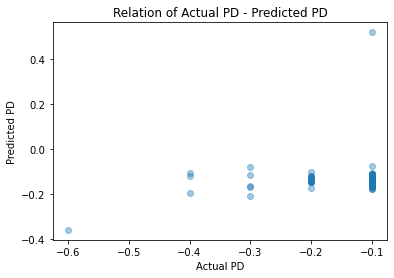

In [7]:
plt.scatter(y_test, y_hat, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Relation of Actual PD - Predicted PD')
plt.show()

In [8]:
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)

print("RMSE:", rmse)
print("MAE:", mean_absolute_error(y_test, y_hat))

RMSE: 0.09589703
MAE: 0.057850745
